##### 1) Plot of Surface Pressure on MPAS grid cell using Delauney Triangulation
- Read data from MPAS grid as xarray
- Read grid/cell info. as xarray 
- Global tripcolor plot of surface pressure

##### 2) Overlay 500hPa wind vector and zoom in

reference: https://gallery.pangeo.io/repos/NCAR/notebook-gallery/notebooks/Run-Anywhere/mpas/plot_of_surface_pressure_on_mpas_grid.html

In [1]:
import time
import numpy as np
import xarray as xr

%matplotlib inline
import matplotlib.collections as mplcollections
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from scipy.interpolate import griddata
 
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#sys.path.append("/glade/work/mingge/MPAS-Analysis/notebook-gallery")

#### read data from MPAS grid as xarray

In [2]:
flnm = '/gpfs/fs1/p/mmm/c3we/MPAS-Release-5.2/CLIM/2010/diag.2011-04-22_10.00.00.nc'
ds = xr.open_dataset(flnm)
ds = ds.squeeze()

# make sure what the pressure units is
ds["surface_pressure"] = ds["surface_pressure"] /100.
#print(ds.surface_pressure.values[:10])

/glade/work/mingge/miniconda3/envs/casper_2020/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
module 'cfgrib.messages' has no attribute 'DEFAULT_INDEXPATH'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


#### read MPAS grid/cell info

In [4]:
flnm_ini = '/gpfs/fs1/p/mmm/c3we/MPAS-Release-5.2/CLIM/2010/x1.40962.init.nc'
ds_i = xr.open_dataset(flnm_ini)
ds_i = ds_i.squeeze()

# Convert to degrees from radians
ds_i["lonCell"] = np.degrees(ds_i.lonCell)
ds_i["latCell"] = np.degrees(ds_i.latCell)

In [5]:
# Global tripcolor plot
# Add cyclic point before computing the triangulation
ds_i["lonCell"] = ((ds_i["lonCell"] + 180) % 360) - 180
triang = tri.Triangulation(ds_i.lonCell, ds_i.latCell)

#### Global tripcolor plot

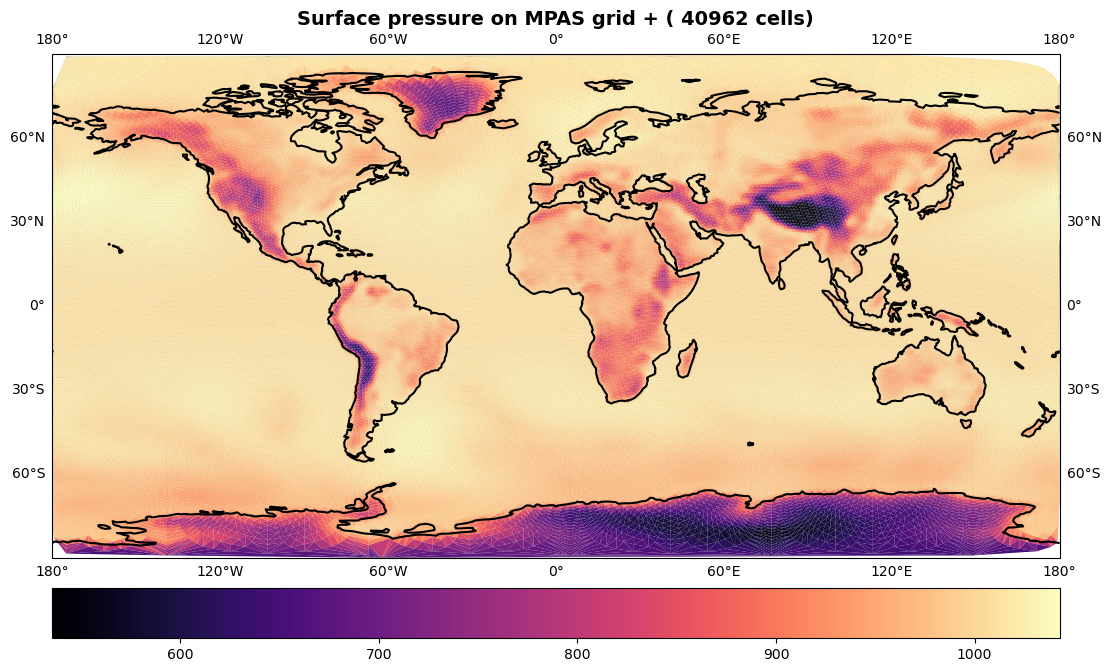

CPU times: user 5.25 s, sys: 38.9 ms, total: 5.28 s
Wall time: 5.55 s


In [6]:
%%time

fig = plt.figure(figsize=(13, 13))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.tripcolor(triang,
                  ds.surface_pressure,
                  edgecolors='k',
                  lw=0.01,
                  alpha=1,
                  transform=ccrs.PlateCarree(),
                  cmap='magma')

ax.set_global()
ax.coastlines(lw=1.5, resolution='110m')
gl = ax.gridlines(draw_labels=True) 
gl.xlines = gl.ylines = False

plt.colorbar(mm, orientation='horizontal', pad=0.03)
plt.title('Surface pressure on MPAS grid + ( ' + str(len(ds_i.lonCell)) + ' cells)',
          fontweight="bold",fontsize=14)

plt.show()

#### 2) Overlay 500hPa wind vector and zoom in

In [7]:
u500 = ds['uzonal_500hPa']
v500= ds['umeridional_250hPa']

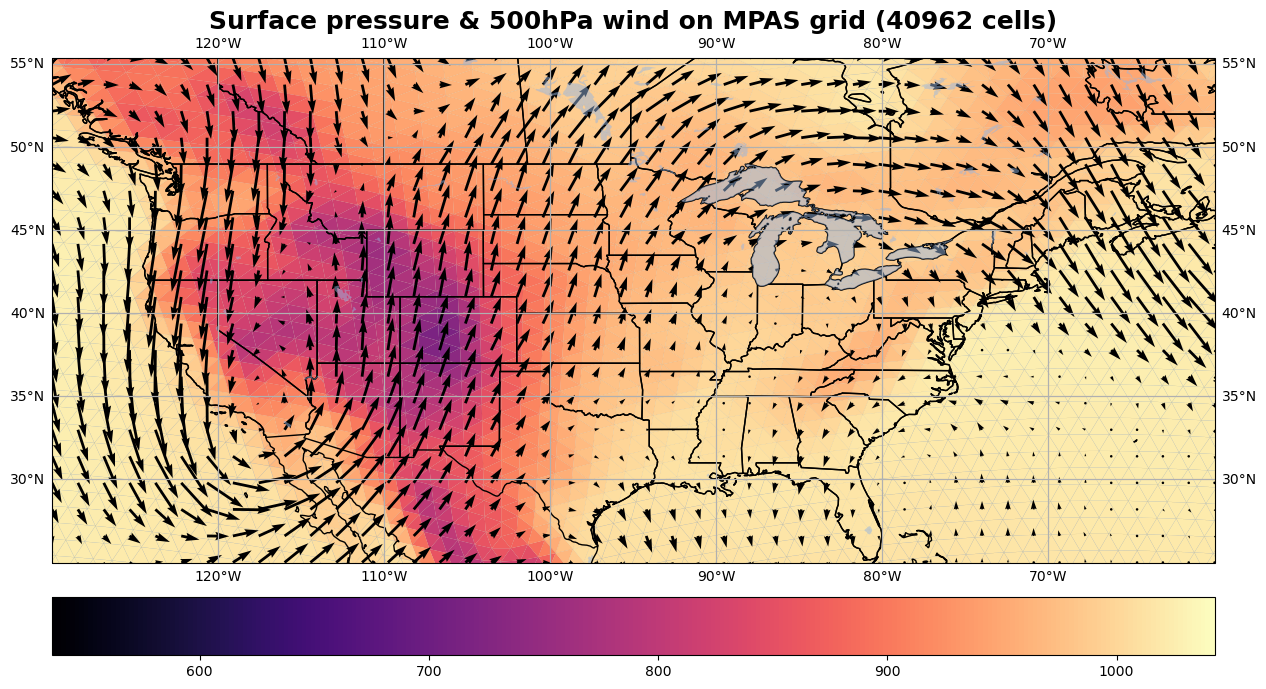

In [8]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#ax.set_global()
# Set lat/lon bounding box and feature resolutions.
ax.set_extent([-130, -60, 25, 50])

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.COASTLINE)

ax.gridlines()

gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

mm = ax.tripcolor(triang,
                  ds.surface_pressure,
                  edgecolors='k',
                  lw=0.01,
                  alpha=1,
                  transform=ccrs.PlateCarree(),
                  cmap='magma')

ax.quiver(ds_i.lonCell, ds_i.latCell, u500, v500, transform=ccrs.PlateCarree(), regrid_shape=20)

plt.colorbar(mm, orientation='horizontal', pad=0.03)
plt.title(f"Surface pressure & 500hPa wind on MPAS grid ({len(ds_i.lonCell)} cells)",
          fontweight="bold", fontsize=18);